# 🚴 Image Captioning

### 👽 Import Libraries

In [2]:
#!pip install transformers

In [1]:
#to avoid warnings
from transformers.utils import logging

logging.set_verbosity_error()


import warnings
warnings.filterwarnings("ignore", message="Using the model-agnostic default `max_length`")

### 🎨Load Model and Processor

In [4]:
from transformers import BlipForConditionalGeneration

In [5]:
model = BlipForConditionalGeneration.from_pretrained('./models/Salesforce/blip-image-captioning-base'
        )

**BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation**

👉 model: https://huggingface.co/Salesforce/blip-image-captioning-base

🚀 BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation. Utilizes noisy web data by bootstrapping captions, achieving state-of-the-art results in tasks like 📷📝 image-text retrieval and image captioning. Accessible for both conditional and unconditional image captioning.

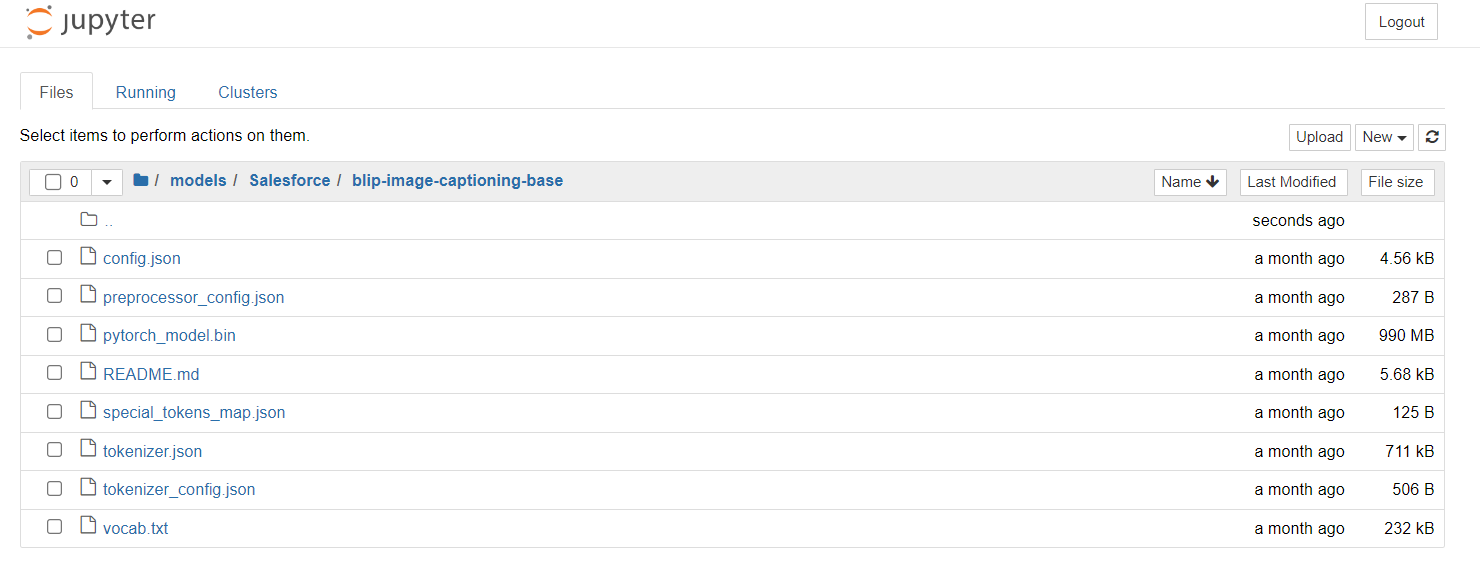

In [6]:
print(f"model of image-captioning: {model} in memory address")

model of image-captioning: BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm):

- **🤖 AutoProcessor**

🤖 **`from transformers import AutoProcessor`**: Imports the AutoProcessor module from Transformers, allowing automatic loading of data processors for NLP tasks with ease. They group processing objects for text, vision, and audio modalities, providing flexibility and ease of use for various NLP tasks.

In [9]:
from transformers import AutoProcessor

In [10]:
processor = AutoProcessor.from_pretrained("./models/Salesforce/blip-image-captioning-base")

print(f"processor details: {processor} in memory address")

processor details: BlipProcessor:
- image_processor: BlipImageProcessor {
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "BlipImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "BlipProcessor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  }
}

- tokenizer: BertTokenizerFast(name_or_path='./models/Salesforce/blip-image-captioning-base', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: Ad

### 🎴 Load Image

See the image: 


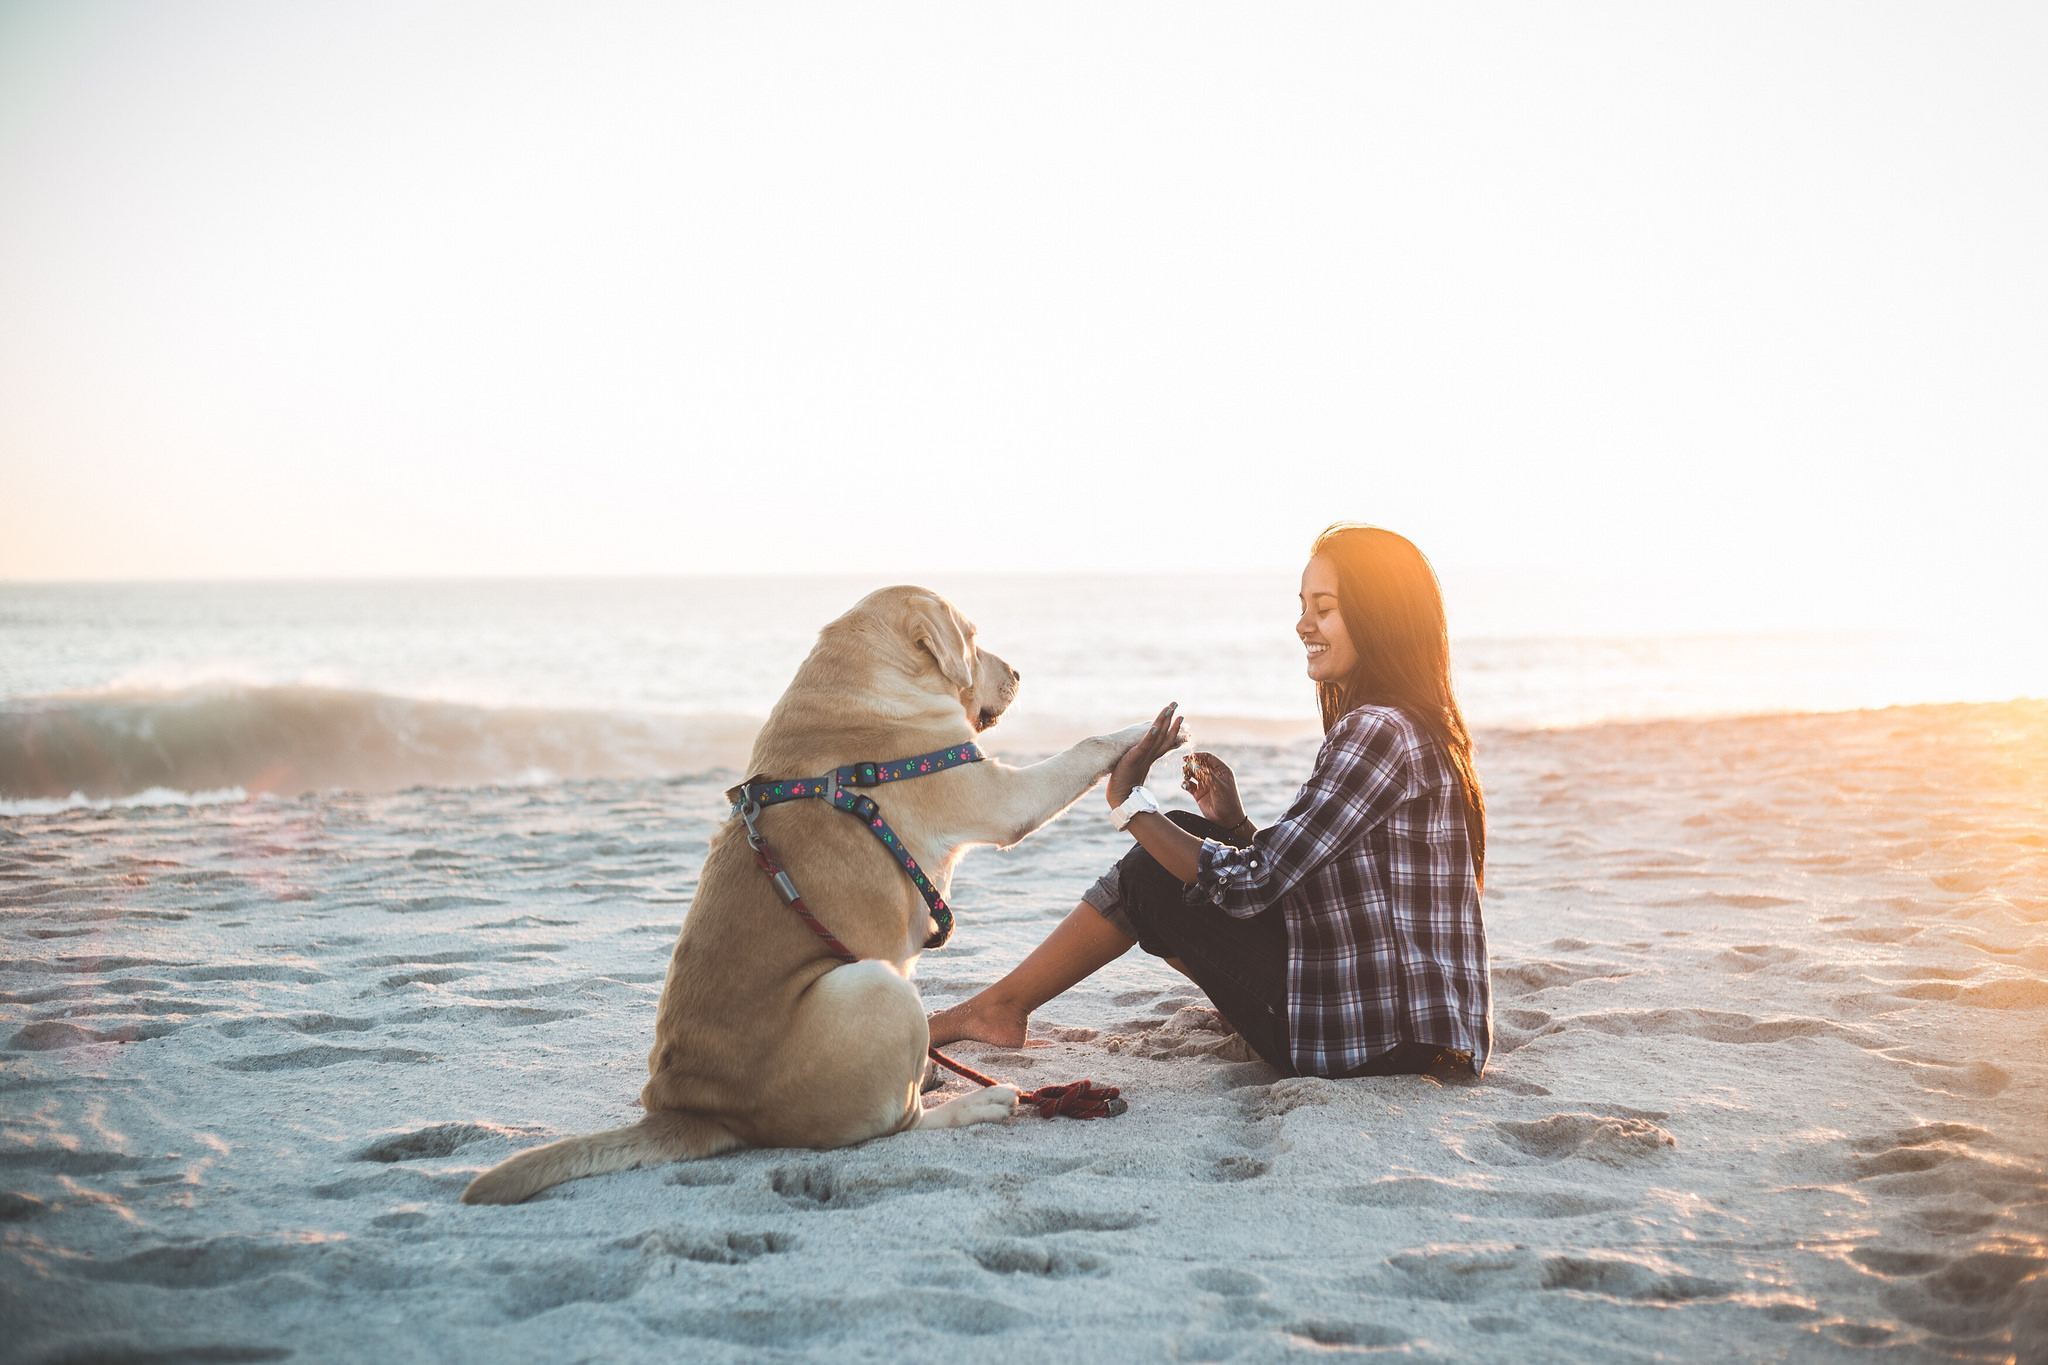

In [11]:
#load image
from PIL import Image

image = Image.open("./beach.jpeg")

print(f"See the image: ")

image

### 🚴 Image and Text Preprocessing

In [12]:
text = "A Photography of "
inputs = processor(image, text, return_tensors = "pt")

In [13]:
print("input details after prepocessing")
print(inputs)

input details after prepocessing
{'pixel_values': tensor([[[[ 0.8647,  0.9230,  0.9376,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9084,  0.9376,  0.9522,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9376,  0.9376,  0.9668,  ...,  1.7552,  1.7552,  1.7552],
          ...,
          [-0.7850, -0.7850, -0.7266,  ..., -0.3178, -0.2740, -0.3616],
          [-0.7558, -0.7558, -0.7412,  ..., -0.3178, -0.3616, -0.4346],
          [-0.7558, -0.7704, -0.7850,  ..., -0.3616, -0.4346, -0.4784]],

         [[ 1.2194,  1.2495,  1.2795,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2344,  1.2645,  1.2945,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2495,  1.2795,  1.3095,  ...,  1.8948,  1.8948,  1.8948],
          ...,
          [-0.5965, -0.5965, -0.5515,  ..., -0.4014, -0.3264, -0.4164],
          [-0.5665, -0.5665, -0.5515,  ..., -0.3864, -0.4164, -0.4914],
          [-0.5665, -0.5815, -0.5965,  ..., -0.4164, -0.4764, -0.5365]],

         [[ 1.2927,  1.3211,  1.3496,  ...,  1.9753,

### 🏇 Generate Tokenization for Image Captioning

In [14]:
#token of word generations

out = model.generate(**inputs)
print(f"Tokens of word: {out}")

Tokens of word: tensor([[30522,  1037,  5855,  1997,  1037,  2450,  1998,  2014,  3899,  2006,
          1996,  3509,   102]])


### 🎯 Decode Text from Word Token

In [15]:
print(processor.decode(out[0], skip_special_tokens = True))

a photography of a woman and her dog on the beach


### 🏆 Unconditional Input Generation Without Text

In [30]:
#preprocessing and encoding
inputs = processor(image, return_tensors = 'pt')
print(f"input details after preprocessing: \n {inputs}")

input details after preprocessing: 
 {'pixel_values': tensor([[[[ 0.8647,  0.9230,  0.9376,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9084,  0.9376,  0.9522,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9376,  0.9376,  0.9668,  ...,  1.7552,  1.7552,  1.7552],
          ...,
          [-0.7850, -0.7850, -0.7266,  ..., -0.3178, -0.2740, -0.3616],
          [-0.7558, -0.7558, -0.7412,  ..., -0.3178, -0.3616, -0.4346],
          [-0.7558, -0.7704, -0.7850,  ..., -0.3616, -0.4346, -0.4784]],

         [[ 1.2194,  1.2495,  1.2795,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2344,  1.2645,  1.2945,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2495,  1.2795,  1.3095,  ...,  1.8948,  1.8948,  1.8948],
          ...,
          [-0.5965, -0.5965, -0.5515,  ..., -0.4014, -0.3264, -0.4164],
          [-0.5665, -0.5665, -0.5515,  ..., -0.3864, -0.4164, -0.4914],
          [-0.5665, -0.5815, -0.5965,  ..., -0.4164, -0.4764, -0.5365]],

         [[ 1.2927,  1.3211,  1.3496,  ...,  1.9

In [31]:
#token generation based on image
out = model.generate(**inputs)
print(f"tokens of words: {out}")

tokens of words: tensor([[30522,  1037,  2450,  3564,  2006,  1996,  3509,  2007,  2014,  3899,
           102]])


In [32]:
#decoding
print(processor.decode(out[0], skip_special_tokens = True))

a woman sitting on the beach with her dog


See the image1: 


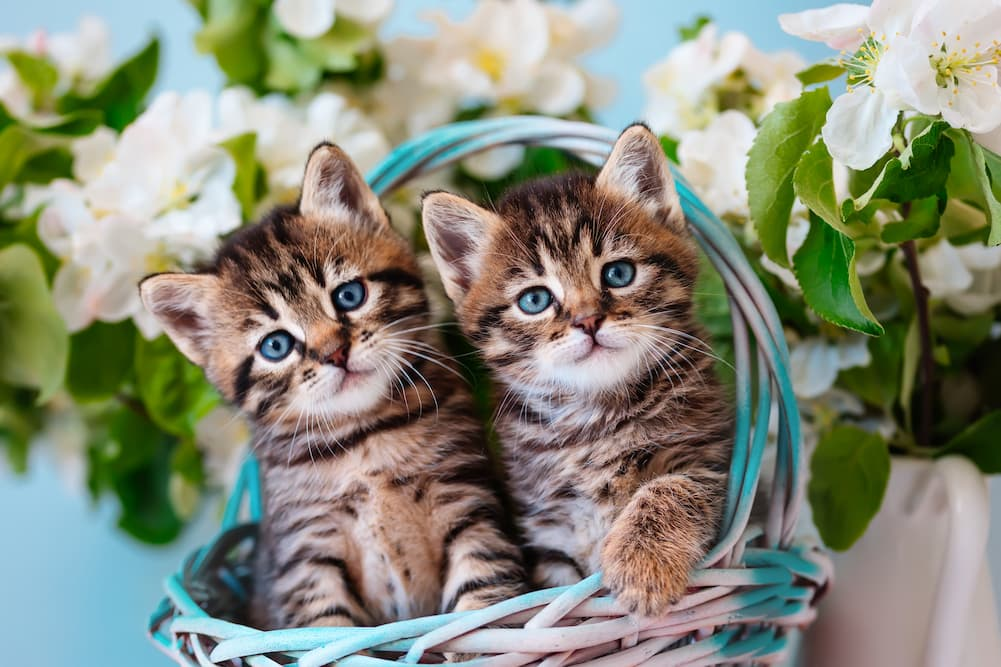

In [42]:
#load image
from PIL import Image

image1 = Image.open("./kittens.jpg")

print(f"See the image1: ")

image1

In [43]:
#preprocessing
input_details = processor(image1, return_tensors = 'pt')
print(f"input details after preprocessing: \n {input_details}")

input details after preprocessing: 
 {'pixel_values': tensor([[[[0.6895, 0.6895, 0.6895,  ..., 1.6092, 1.5654, 1.5946],
          [0.6895, 0.6895, 0.6895,  ..., 1.5946, 1.5800, 1.6092],
          [0.6895, 0.6895, 0.6895,  ..., 1.5216, 1.5070, 1.5508],
          ...,
          [0.3975, 0.3975, 0.3975,  ..., 1.0106, 0.9814, 0.9814],
          [0.4121, 0.3975, 0.3829,  ..., 0.9960, 0.9960, 0.9960],
          [0.4121, 0.3975, 0.3829,  ..., 0.9960, 0.9960, 0.9960]],

         [[1.3395, 1.3395, 1.3395,  ..., 1.7297, 1.6847, 1.7147],
          [1.3395, 1.3395, 1.3395,  ..., 1.6997, 1.6847, 1.7147],
          [1.3395, 1.3395, 1.3395,  ..., 1.6397, 1.6096, 1.6547],
          ...,
          [1.1594, 1.1594, 1.1594,  ..., 0.9193, 0.8893, 0.8893],
          [1.1744, 1.1594, 1.1444,  ..., 0.9043, 0.9043, 0.9043],
          [1.1744, 1.1594, 1.1444,  ..., 0.9043, 0.9043, 0.9043]],

         [[1.7620, 1.7620, 1.7620,  ..., 1.9184, 1.8615, 1.8899],
          [1.7620, 1.7620, 1.7620,  ..., 1.8615, 1.847

In [44]:
#generate tokens
outputs = model.generate(**input_details)
print(f"tokens of words: {outputs}")

tokens of words: tensor([[30522,  2048, 18401,  2015,  1999,  1037, 10810,  2007,  4870,   102]])


In [45]:
#decoding text
print(processor.decode(outputs[0], skip_special_tokens = True))

two kittens in a basket with flowers
